In [1]:
# Import necessary libraries for MLP and reshaping the data structres
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
Startups = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day41-NeuralNetwork\Datasets_ANN Assignment\50_Startups (2).csv")
Startups.head()      

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#details of rpl 
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#data types        
Startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
#checking for na and null value
Startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
#checking unique value for each columns
Startups.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [9]:
#Performing EDA
EDA ={"column ": Startups.columns,
      "mean": Startups.mean(),
      "median":Startups.median(),
      "mode":Startups.mode(),
      "standard deviation": Startups.std(),
      "variance":Startups.var(),
      "skewness":Startups.skew(),
      "kurtosis":Startups.kurt()}

EDA

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\3825997252.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "mean": Startups.mean(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\3825997252.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "median":Startups.median(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\3825997252.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "standard deviation": Startups.std(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\3825997252

{'column ': Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object'),
 'mean': R&D Spend           73721.6156
 Administration     121344.6396
 Marketing Spend    211025.0978
 Profit             112012.6392
 dtype: float64,
 'median': R&D Spend           73051.080
 Administration     122699.795
 Marketing Spend    212716.240
 Profit             107978.190
 dtype: float64,
 'mode':     R&D Spend  Administration  Marketing Spend       State     Profit
 0         0.0        51283.14              0.0  California   14681.40
 1         NaN        51743.15              NaN    New York   35673.41
 2         NaN        65947.93              NaN         NaN   42559.73
 3         NaN        82982.09              NaN         NaN   49490.75
 4         NaN        84710.77              NaN         NaN   64926.08
 5         NaN        85047.44              NaN         NaN   65200.33
 6         NaN        91391.77              NaN         NaN   69758.98
 7         NaN

In [10]:
#variance for each column
Startups.var() 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\3708099796.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Startups.var()


R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

#### Graphical repersentation 

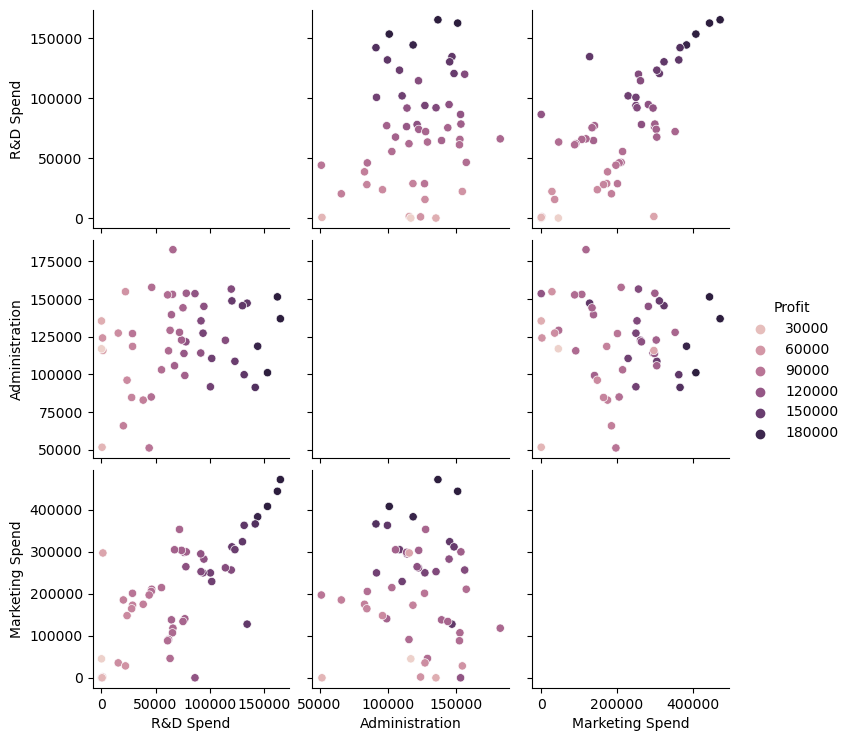

In [11]:
##historgam and scatter plot
import seaborn as sns
sns.pairplot(Startups,hue='Profit')

In [12]:
# Normalization function using z std. all are continuous data.
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df = norm_func(Startups.iloc[:,:3])

In [14]:
#categorical
enc_df = pd.get_dummies(Startups.iloc[:,[3]])

In [15]:
#final dataframe
model_df = pd.concat([Startups.iloc[:,[4]],df,enc_df], axis =1)
model_df.describe()

,Profit,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,112012.639200,1.376677e-16,1.794676e-15,-3.730349e-16,0.340000,0.320000,0.340000
std,40306.180338,1.000000e+00,1.000000e+00,1.000000e+00,0.478518,0.471212,0.478518
min,14681.400000,-1.606056e+00,-2.500606e+00,-1.725608e+00,0.000000,0.000000,0.000000
25%,90138.902500,-7.360258e-01,-6.286633e-01,-6.682865e-01,0.000000,0.000000,0.000000
50%,107978.190000,-1.460790e-02,4.836765e-02,1.382891e-02,0.000000,0.000000,0.000000
75%,139765.977500,6.074034e-01,8.386646e-01,7.232297e-01,1.000000,1.000000,1.000000
max,192261.830000,1.996146e+00,2.187927e+00,2.132295e+00,1.000000,1.000000,1.000000


In [16]:
np.random.seed(10)

In [17]:
from sklearn.model_selection import train_test_split
model_df_train, model_df_test = train_test_split(model_df, test_size = 0.2,random_state = 457) # 20% test data

x_train = model_df_train.iloc[:,1:].values.astype("float32")
y_train = model_df_train.iloc[:,0].values.astype("float32")
x_test = model_df_test.iloc[:,1:].values.astype("float32")
y_test = model_df_test.iloc[:,0].values.astype("float32")

In [18]:
#building model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100,100),activation='relu', max_iter=20 , solver = 'lbfgs')
model.fit(x_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=20, solver='lbfgs')

In [19]:
# Evaluating the model on test data using mean absolute square error
from sklearn import metrics
mae1 = metrics.mean_absolute_error(y_test, model.predict(x_test))
print ("error on test data", mae1) 

error on test data 5580.035537978223


In [20]:
# Evaluating the model on train data 
mae2 = metrics.mean_absolute_error(y_train, model.predict(x_train))
print("error on train data: ",mae2)

error on train data:  6263.5406975020505


#### Problem 2 : 
We have a dataset about 517 fires from the Montesano natural park in Portugal. For each incident, weekday, month, coordinates, and the burnt area are recorded, as well as several meteorological data such as rain, temperature, humidity, and wind. Predict the burnt area of forest fires with the help of an Artificial Neural Network model

In [21]:
#loading the dataset
fireforests = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day41-NeuralNetwork\Datasets_ANN Assignment\fireforests.csv")

In [22]:
#dropping unwanted column
fireforests.drop(["day","month"], axis = 1, inplace = True)
    

In [23]:
#details of rpl 
fireforests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      517 non-null    float64
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   ISI       517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    int64  
 6   wind      517 non-null    float64
 7   rain      517 non-null    float64
 8   area      517 non-null    float64
 9   dayfri    517 non-null    int64  
 10  daymon    517 non-null    int64  
 11  daysat    517 non-null    int64  
 12  daysun    517 non-null    int64  
 13  daythu    517 non-null    int64  
 14  daytue    517 non-null    int64  
 15  daywed    517 non-null    int64  
 16  monthapr  517 non-null    int64  
 17  monthaug  517 non-null    int64  
 18  monthdec  517 non-null    int64  
 19  monthfeb  517 non-null    int64  
 20  monthjan  517 non-null    int64 

In [24]:
fireforests.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#data types        
fireforests.dtypes

FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
dayfri        int64
daymon        int64
daysat        int64
daysun        int64
daythu        int64
daytue        int64
daywed        int64
monthapr      int64
monthaug      int64
monthdec      int64
monthfeb      int64
monthjan      int64
monthjul      int64
monthjun      int64
monthmar      int64
monthmay      int64
monthnov      int64
monthoct      int64
monthsep      int64
dtype: object

In [26]:
#checking for na and null value
fireforests.isna().sum()

FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
dtype: int64

In [27]:
fireforests.isnull().sum()

FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
dtype: int64

In [28]:
#checking unique value for each columns
fireforests.nunique()

FFMC        106
DMC         215
DC          219
ISI         119
temp        192
RH           75
wind         21
rain          7
area        251
dayfri        2
daymon        2
daysat        2
daysun        2
daythu        2
daytue        2
daywed        2
monthapr      2
monthaug      2
monthdec      2
monthfeb      2
monthjan      2
monthjul      2
monthjun      2
monthmar      2
monthmay      2
monthnov      2
monthoct      2
monthsep      2
dtype: int64

In [29]:
#Performing EDA
EDA ={"column ": fireforests.columns,
      "mean": fireforests.mean(),
      "median":fireforests.median(),
      "mode":fireforests.mode(),
      "standard deviation": fireforests.std(),
      "variance":fireforests.var(),
      "skewness":fireforests.skew(),
      "kurtosis":fireforests.kurt()}

EDA

{'column ': Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
        'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
        'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
        'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
       dtype='object'),
 'mean': FFMC         90.644681
 DMC         110.872340
 DC          547.940039
 ISI           9.021663
 temp         18.889168
 RH           44.288201
 wind          4.017602
 rain          0.021663
 area         12.847292
 dayfri        0.164410
 daymon        0.143133
 daysat        0.162476
 daysun        0.183752
 daythu        0.117988
 daytue        0.123791
 daywed        0.104449
 monthapr      0.017408
 monthaug      0.355899
 monthdec      0.017408
 monthfeb      0.038685
 monthjan      0.003868
 monthjul      0.061896
 monthjun      0.032882
 monthmar      0.104449
 monthmay      0.003868
 monthnov      0.001934
 monthoct      0.029

In [30]:
#variance for each column
fireforests.var() 

FFMC           30.471624
DMC          4101.951889
DC          61536.835467
ISI            20.788832
temp           33.716898
RH            266.259802
wind            3.210019
rain            0.087592
area         4052.063225
dayfri          0.137646
daymon          0.122884
daysat          0.136341
daysun          0.150278
daythu          0.104269
daytue          0.108677
daywed          0.093720
monthapr        0.017138
monthaug        0.229679
monthdec        0.017138
monthfeb        0.037260
monthjan        0.003861
monthjul        0.058177
monthjun        0.031862
monthmar        0.093720
monthmay        0.003861
monthnov        0.001934
monthoct        0.028226
monthsep        0.222437
dtype: float64

In [31]:
# Normalization function using z std. all are continuous data.
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [32]:
# Normalized data frame (considering the numerical part of data)
out = fireforests['area']
inp = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']

df = norm_func(fireforests[inp])

In [33]:
#final dataframe
model_df = pd.concat([out,df], axis =1)
model_df.describe()

np.random.seed(10)

In [34]:
from sklearn.model_selection import train_test_split
model_df_train, model_df_test = train_test_split(model_df, test_size = 0.2,random_state = 457) # 20% test data

x_train = model_df_train.iloc[:,1:].values.astype("float32")
y_train = model_df_train.iloc[:,0].values.astype("float32")
x_test = model_df_test.iloc[:,1:].values.astype("float32")
y_test = model_df_test.iloc[:,0].values.astype("float32")

In [35]:
#building model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,10,),activation='tanh', max_iter=10)
model.fit(x_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=10)

In [36]:
# Evaluating the model on test data using mean absolute square error
from sklearn import metrics
mae1 = metrics.mean_absolute_error(y_test, model.predict(x_test))
print ("error on test data", mae1) 

error on test data 20.677696


In [37]:
# Evaluating the model on train data 
mae2 = metrics.mean_absolute_error(y_train, model.predict(x_train))
print("error on train data: ",mae2)

error on train data:  11.867183


#### Problem 3:
The following dataset consists of 1030 instances with 9 attributes and has no missing values. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (Mega Pascal). Build a Neural network model to predict the compressive strength.

In [38]:
#loading the dataset
concrete = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day41-NeuralNetwork\Datasets_ANN Assignment\concrete.csv")
        

In [39]:
#details of rpl 
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [40]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [41]:
#data types        
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [42]:
#checking for na and null value
concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [43]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [79]:
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [44]:
#checking unique value for each columns
concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [45]:
#Performing EDA
EDA ={"column ": concrete.columns,
      "mean": concrete.mean(),
      "median":concrete.median(),
      "mode":concrete.mode(),
      "standard deviation": concrete.std(),
      "variance":concrete.var(),
      "skewness":concrete.skew(),
      "kurtosis":concrete.kurt()}

EDA

{'column ': Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
        'fineagg', 'age', 'strength'],
       dtype='object'),
 'mean': cement          281.167864
 slag             73.895825
 ash              54.188350
 water           181.567282
 superplastic      6.204660
 coarseagg       972.918932
 fineagg         773.580485
 age              45.662136
 strength         35.817961
 dtype: float64,
 'median': cement          272.900
 slag             22.000
 ash               0.000
 water           185.000
 superplastic      6.400
 coarseagg       968.000
 fineagg         779.500
 age              28.000
 strength         34.445
 dtype: float64,
 'mode':    cement  slag  ash  water  superplastic  coarseagg  fineagg   age  strength
 0   362.6   0.0  0.0  192.0           0.0      932.0    594.0  28.0      33.4
 1   425.0   NaN  NaN    NaN           NaN        NaN    755.8   NaN       NaN,
 'standard deviation': cement          104.506364
 slag             86.279342
 a

In [46]:
#variance for each column
concrete.var() 

cement          10921.580220
slag             7444.124812
ash              4095.616541
water             456.002651
superplastic       35.686781
coarseagg        6045.677357
fineagg          6428.187792
age              3990.437729
strength          279.081814
dtype: float64

#### graphical repersentation 

In [48]:
##historgam and scatter plot
import seaborn as sns

In [ ]:
sns.pairplot(concrete,hue='water')


In [76]:
#boxplot for every columns
import matplotlib.pyplot as plt

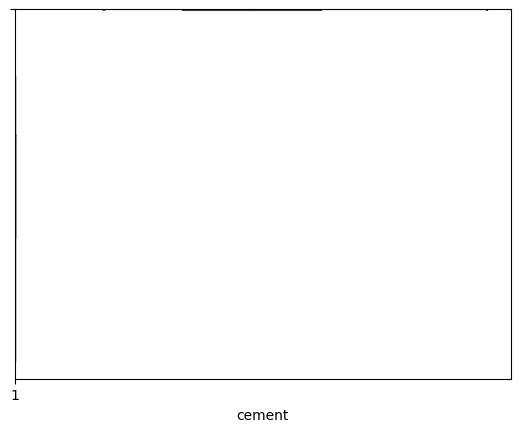

In [83]:
plt.boxplot("cement", data =concrete)
plt.show()

In [53]:
sns.boxplot("slag", data = concrete)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slag'>

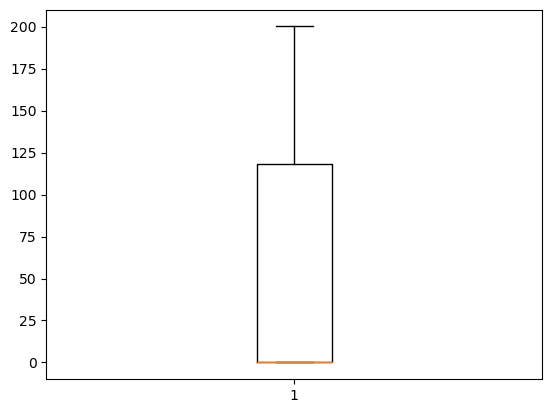

In [81]:
plt.boxplot("ash", data = concrete)
plt.show()

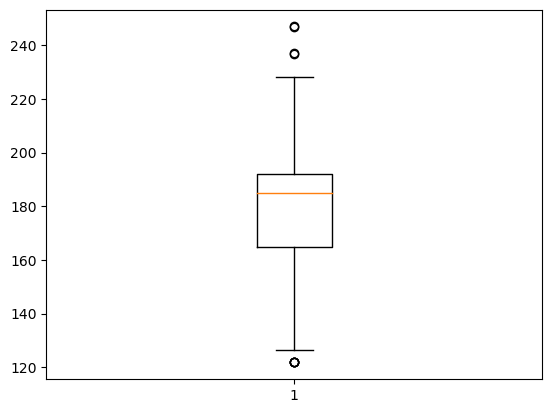

In [80]:
plt.boxplot("water", data = concrete)
plt.show()

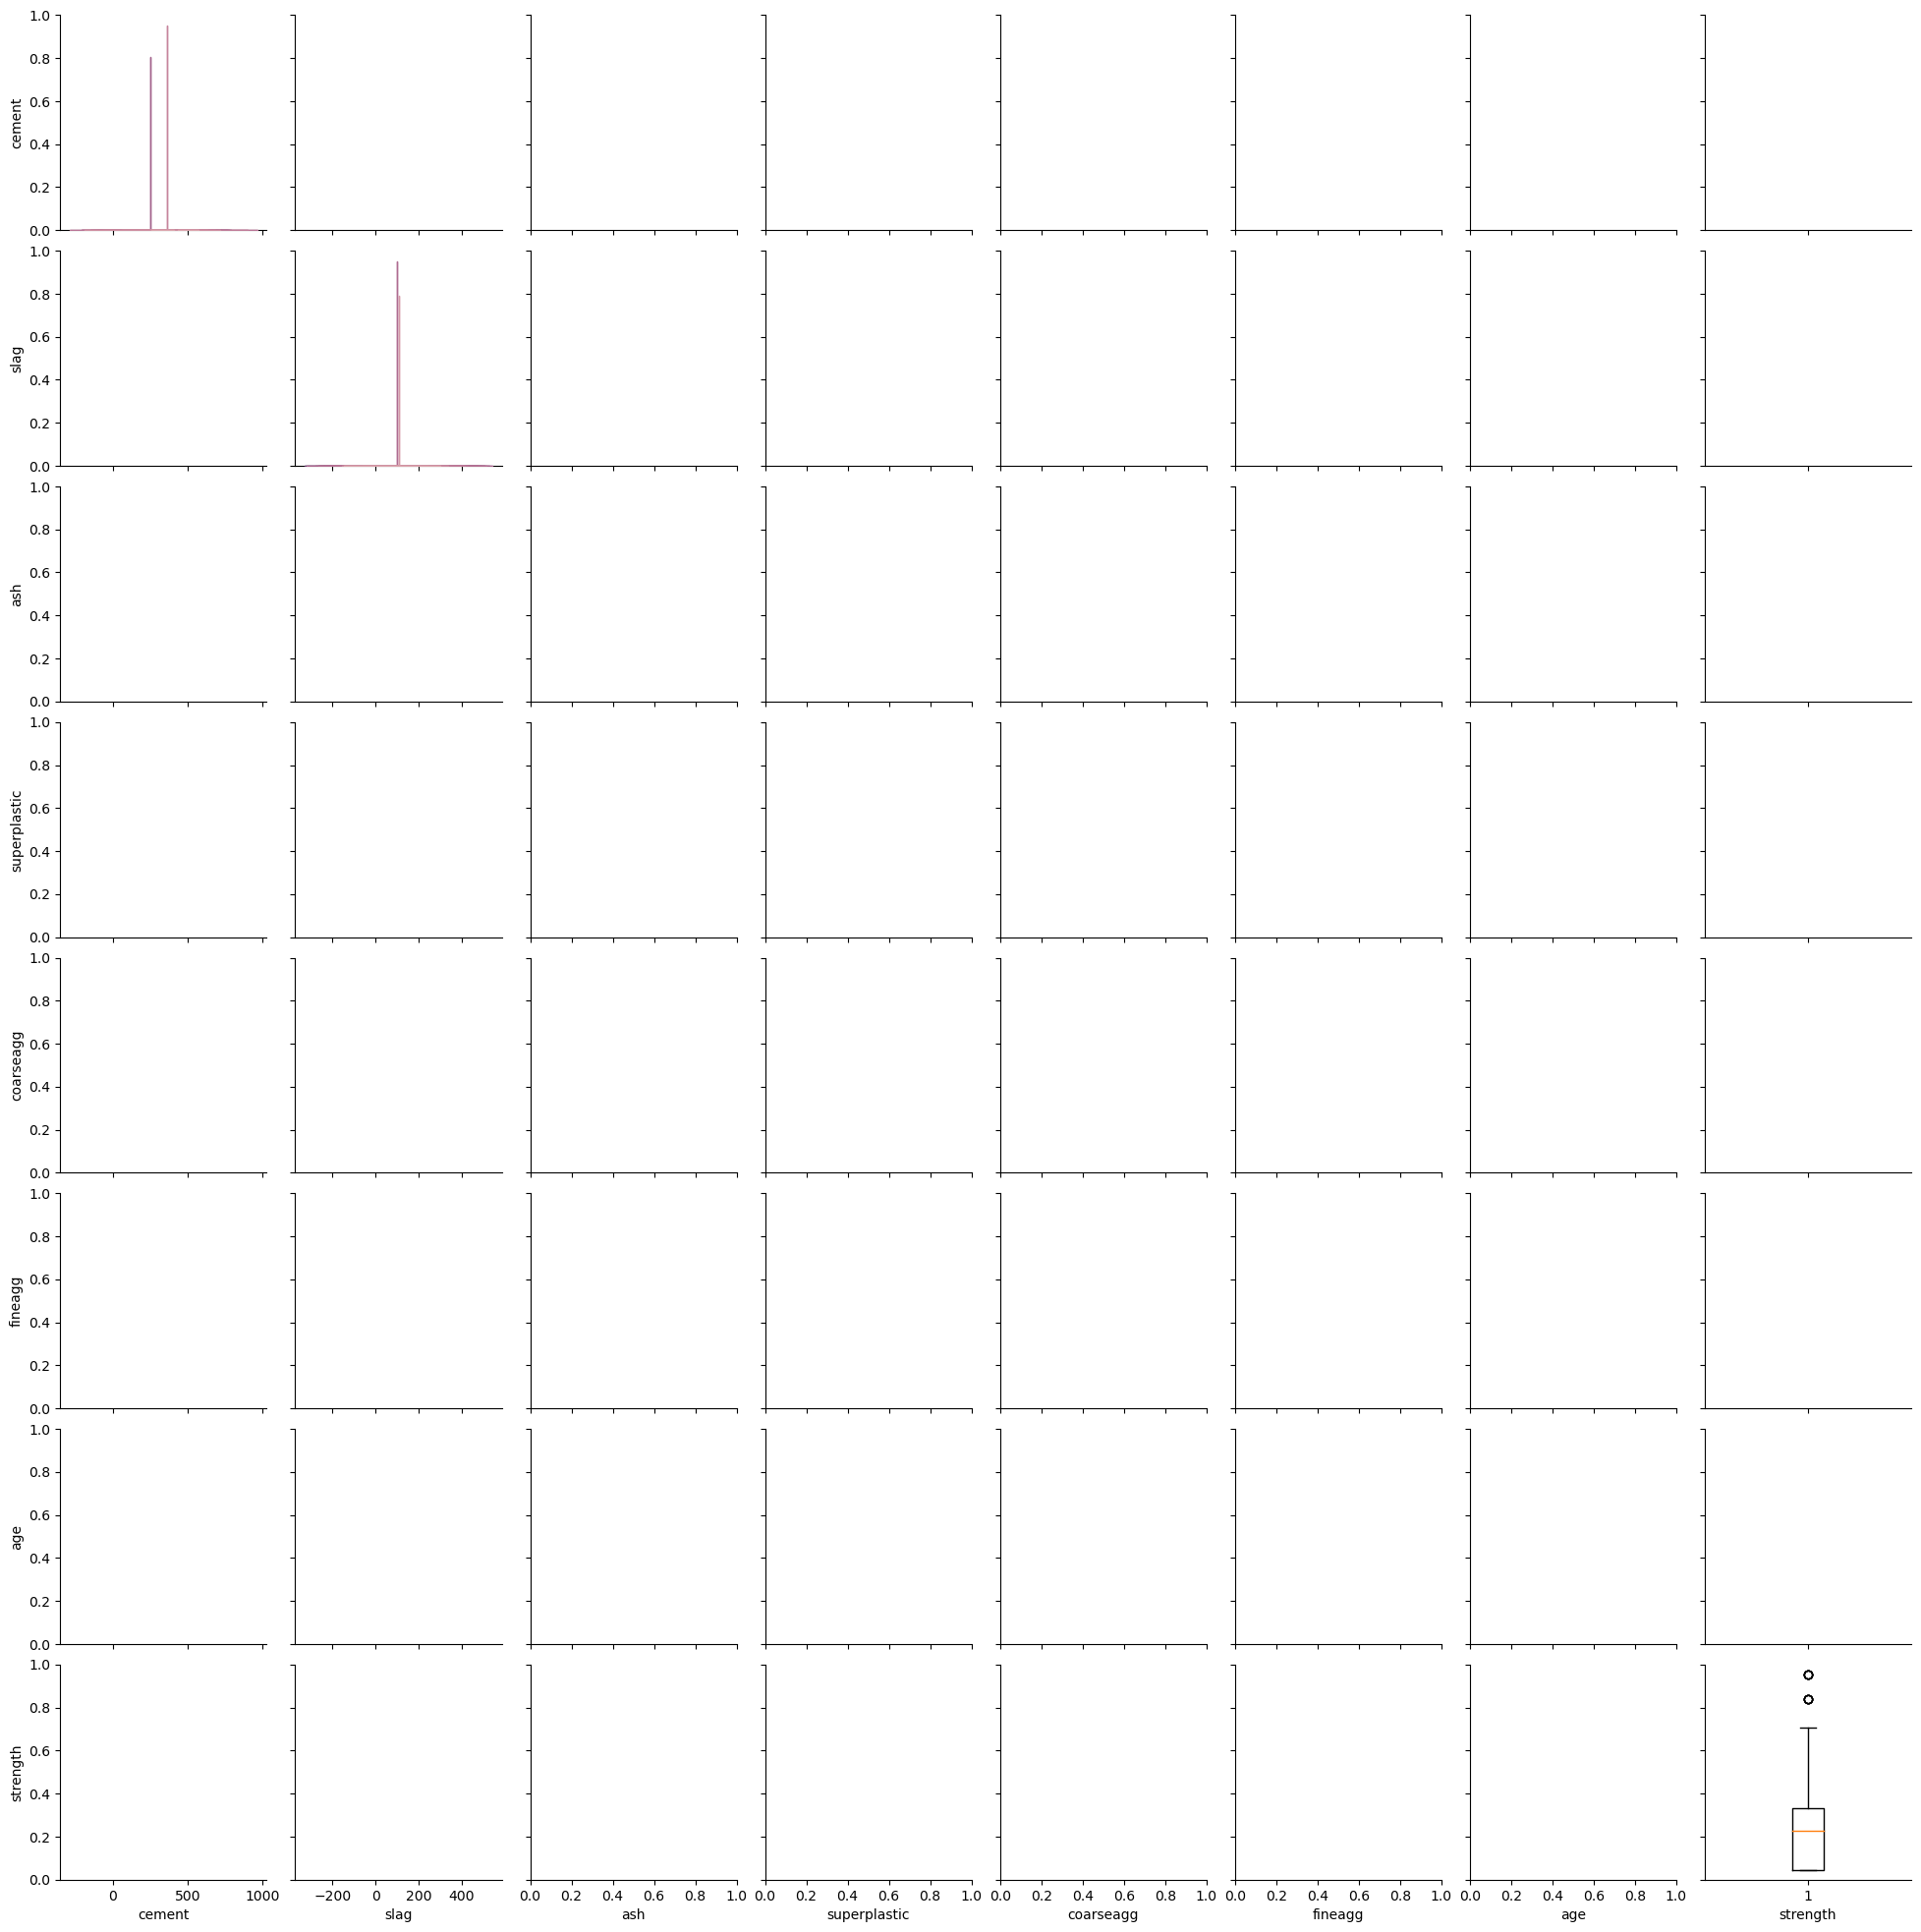

In [86]:
plt.boxplot("superplastic", data =concrete)
plt.show()

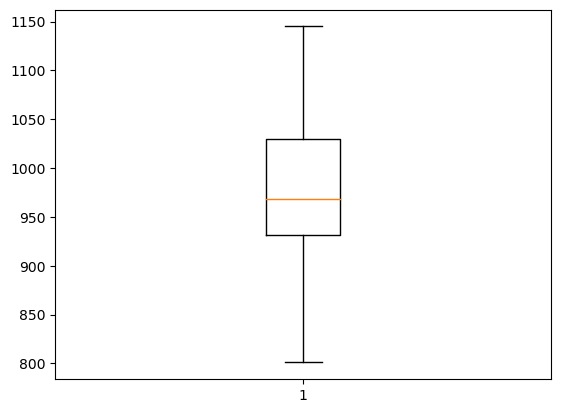

In [87]:
plt.boxplot("coarseagg", data =concrete)
plt.show()

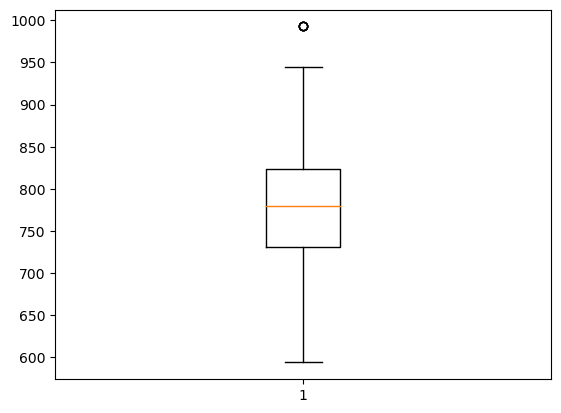

In [88]:
plt.boxplot("fineagg", data =concrete)
plt.show()

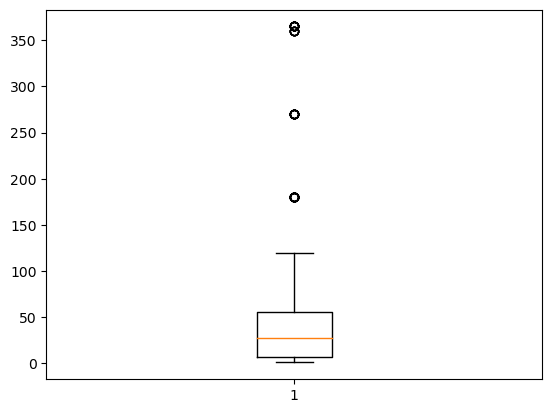

In [89]:
plt.boxplot("age", data =concrete)
plt.show()

In [90]:
concrete.boxplot(column=['cement', 'slag', 'ash', 'water','superplastic' , 'coarseagg' , 'fineagg' , 'age'])  

<AxesSubplot:>

In [91]:
# Normalization function using z std. all are continuous data.
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [92]:
# Normalized data frame (considering the numerical part of data)
df = norm_func(concrete.iloc[:,:8])

In [93]:
#final dataframe
model_df = pd.concat([concrete.iloc[:,[8]],df], axis =1)
model_df.describe()

,strength,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,35.817961,1.192574e-15,-1.724618e-18,6.036164e-18,3.880391e-15,3.488040e-16,-7.663773e-16,-4.682339e-16,9.657862e-17
std,16.705742,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.330000,-1.714421e+00,-8.564718e-01,-8.467326e-01,-2.798851e+00,-1.038638e+00,-2.211064e+00,-2.239829e+00,-7.070160e-01
25%,23.710000,-8.496407e-01,-8.564718e-01,-8.467326e-01,-7.805147e-01,-1.038638e+00,-5.262618e-01,-5.317114e-01,-6.120340e-01
50%,34.445000,-7.911350e-02,-6.014861e-01,-8.467326e-01,1.607513e-01,3.269920e-02,-6.326279e-02,7.383152e-02,-2.795973e-01
75%,46.135000,6.586406e-01,8.003558e-01,1.001791e+00,4.885554e-01,6.688058e-01,7.264077e-01,6.288606e-01,1.636517e-01
max,82.600000,2.476712e+00,3.309068e+00,2.279976e+00,3.064159e+00,4.351528e+00,2.213149e+00,2.731735e+00,5.055221e+00


In [94]:
np.random.seed(10)

In [95]:
from sklearn.model_selection import train_test_split
model_df_train, model_df_test = train_test_split(model_df, test_size = 0.2,random_state = 457) # 20% test data

x_train = model_df_train.iloc[:,1:].values.astype("float32")
y_train = model_df_train.iloc[:,0].values.astype("float32")
x_test = model_df_test.iloc[:,1:].values.astype("float32")
y_test = model_df_test.iloc[:,0].values.astype("float32")

In [96]:
#building model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,10,),activation='tanh', max_iter=10)
model.fit(x_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=10)

In [97]:
# Evaluating the model on test data using mean absolute square error
from sklearn import metrics
mae1 = metrics.mean_absolute_error(y_test, model.predict(x_test))
print ("error on test data", mae1) 

error on test data 34.646137


In [98]:
# Evaluating the model on train data 
mae2 = metrics.mean_absolute_error(y_train, model.predict(x_train))
print("error on train data: ",mae2)

error on train data:  35.654324


#### Problem 4:
RPL Banking and Financing company wants to study the behavior patterns of their customers so that they can efficiently provide their services and solve the problem of churn. They have historical data of their customers. Build an Artificial Neural Network with Exited as the target variable.
    

In [54]:
#loading the dataset
rpl = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day41-NeuralNetwork\Datasets_ANN Assignment\RPL.csv")
rpl    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
#details of rpl 
rpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
rpl.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
#data types        
rpl.dtypes

#checking for na and null value
rpl.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
rpl.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
#checking unique value for each columns
rpl.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [60]:
#Performing EDA
EDA ={"column ": rpl.columns,
      "mean": rpl.mean(),
      "median":rpl.median(),
      "mode":rpl.mode(),
      "standard deviation": rpl.std(),
      "variance":rpl.var(),
      "skewness":rpl.skew(),
      "kurtosis":rpl.kurt()}

EDA

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\2691769370.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "mean": rpl.mean(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\2691769370.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "median":rpl.median(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\2691769370.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "standard deviation": rpl.std(),
C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\2691769370.py:7: FutureWa

{'column ': Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'),
 'mean': RowNumber          5.000500e+03
 CustomerId         1.569094e+07
 CreditScore        6.505288e+02
 Age                3.892180e+01
 Tenure             5.012800e+00
 Balance            7.648589e+04
 NumOfProducts      1.530200e+00
 HasCrCard          7.055000e-01
 IsActiveMember     5.151000e-01
 EstimatedSalary    1.000902e+05
 Exited             2.037000e-01
 dtype: float64,
 'median': RowNumber          5.000500e+03
 CustomerId         1.569074e+07
 CreditScore        6.520000e+02
 Age                3.700000e+01
 Tenure             5.000000e+00
 Balance            9.719854e+04
 NumOfProducts      1.000000e+00
 HasCrCard          1.000000e+00
 IsActiveMember     1.000000e+00
 EstimatedSalary    1.001939e+05
 Exited             0.000000e+0

In [61]:
#variance for each column
rpl.var() 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_11312\2991994714.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rpl.var()


RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [62]:
rpl.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

#### graphical repersentation 

In [63]:
##historgam and scatter plot
import seaborn as sns

sns.pairplot(rpl.iloc[:,[0,3,4,5,9,10]],hue='Exited')

#### boxplot for every columns

In [100]:
sns.boxplot(x = "Exited", y = "CreditScore", data =rpl)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

In [65]:
sns.boxplot(x = "Exited", y = "Age", data = rpl)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

In [66]:
sns.boxplot(x = "Exited", y = "Balance", data = rpl)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

In [67]:
sns.boxplot(x = "Exited", y = "EstimatedSalary", data = rpl)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

In [68]:
sns.boxplot(x = "Exited", y = "Tenure", data =rpl)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

In [ ]:
rpl.boxplot(column=['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure'])  

In [ ]:
# Normalization function using z std. all are continuous data.
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df = norm_func(rpl.iloc[:,[0,3,4,5,6,7,8,9]])
df.describe()

In [ ]:
#categorical
enc_df = pd.get_dummies(rpl.iloc[:,[1,2]])
enc_df.columns

In [ ]:
#final dataframe
model_df = pd.concat([rpl.iloc[:,[10]],df,enc_df], axis =1)

In [ ]:
#building model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
from keras.utils import np_utils

np.random.seed(10)

In [ ]:
from sklearn.model_selection import train_test_split

model_df_train, model_df_test = train_test_split(model_df, test_size = 0.2,random_state = 457) # 20% test data

x_train = model_df_train.iloc[:,1:].values.astype("float32")
y_train = model_df_train.iloc[:,0].values.astype("float32")
x_test = model_df_test.iloc[:,1:].values.astype("float32")
y_test = model_df_test.iloc[:,0].values.astype("float32")

In [ ]:
# one hot encoding outputs for both train and test data sets 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# Storing the number of classes into the variable num_of_classes 
num_of_classes = y_test.shape[1]

In [ ]:
# Creating a user defined function to return the model for which we are
# giving the input to train the ANN mode
def design_mlp():
    # Initializing the model 
    model = Sequential()
    model.add(Dense(150,input_dim =13,activation="relu"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(120,activation="tanh"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(num_of_classes,activation="softmax"))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model

In [ ]:
# building a cnn model using train data set and validating on test data set
model = design_mlp()

In [ ]:
# fitting model on train data
model.fit(x=x_train,y=y_train,batch_size=500,epochs=5)

In [ ]:
# Evaluating the model on test data  
eval_score_test = model.evaluate(x_test,y_test,verbose = 1)

In [ ]:
# accuracy on test data set
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100)) 

In [ ]:
# Evaluating the model on train data 
eval_score_train = model.evaluate(x_train,y_train,verbose=0)

In [ ]:
# accuracy on train data set 
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100)) 